In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
dataku = pd.read_csv('marketing_campaign_data.csv')

In [4]:
data = dataku.copy()

In [5]:
data.head(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
data.shape

(2240, 30)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [150]:
data = dataku.copy()

In [151]:
data['Dt_Customer'] = data['Dt_Customer'].apply(lambda x : x.split('-')[-1])
data['Dt_Customer'].value_counts()

2013    1189
2014     557
2012     494
Name: Dt_Customer, dtype: int64

In [152]:
data['Age'] = data['Dt_Customer'].astype(int) - data['Year_Birth']

In [153]:
data = data.drop(['Unnamed: 0', 'Dt_Customer', 'Year_Birth'], axis=1)

In [154]:
data = data[data['NumWebVisitsMonth'] > 0]

In [155]:
data.shape

(2229, 28)

In [156]:
data['Response'].value_counts()

0    1895
1     334
Name: Response, dtype: int64

In [157]:
data['Age'] = data['Age'].apply(lambda x : 'Young' if x < 25 else ('Adult' if x < 60 else 'Senior'))
# we choose 30 as young threshold because 30 is well known for life stage transition
# in terms of e-commerce, under 30 has more buying power than under 25 so that campaign is more likely to be success 

In [158]:
cr0 = data[data['Response']==0].groupby(['Age']).aggregate({'NumWebVisitsMonth' :'count'}).reset_index()
cr1 = data[data['Response']==1].groupby(['Age']).aggregate({'NumWebVisitsMonth' :'count'}).reset_index()
cr1['Conversion Rate'] = cr1['NumWebVisitsMonth'] / (cr0['NumWebVisitsMonth'] + cr1['NumWebVisitsMonth']) * 100
cr1['Age'] = pd.Categorical(cr1['Age'], categories=['Young', 'Adult', 'Senior'])
cr1 = cr1.sort_values('Age')
cr1

,Age,NumWebVisitsMonth,Conversion Rate
2,Young,14,15.730337
0,Adult,277,14.844587
1,Senior,43,15.693431


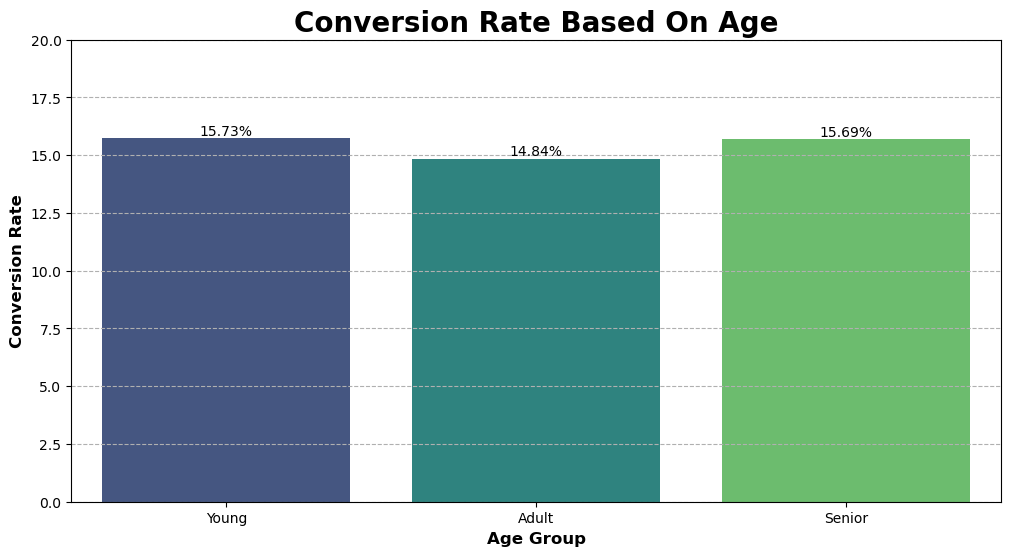

In [159]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'Age', y = 'Conversion Rate', data = cr1, palette='viridis')
plt.title('Conversion Rate Based On Age', weight='bold', fontsize=20)
plt.xlabel('Age Group', fontsize=12, weight='bold')
plt.ylabel('Conversion Rate', fontsize=12, weight='bold')
plt.ylim(0, 20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.bar_label(ax.containers[0], fmt='%.2f%%')
plt.show()

based on the analysis, all group have relative low conversion rates. it indicates that the existing strategies are not that impactful. this is either because of missaligned marketing or bad website experience. to solve it, we should:

1. improve UI UX design and try to implementing A/B testing to ensure a positive website experience.
2. retargeting strategies to ensure that that is align with customer preference.
3. young is a potential customer, try to add gamification purchase.

In [164]:
campaign = data[['ID', 'Age', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

In [165]:
young             = campaign[campaign['Age']=='Young']
adult             = campaign[campaign['Age']=='Adult']
senior            = campaign[campaign['Age']=='Senior']
young_acceptcamp  = young[(young['Response'] == 1) & ((young['AcceptedCmp1'] == 1) | (young['AcceptedCmp2'] == 1) | (young['AcceptedCmp3'] == 1) | (young['AcceptedCmp4'] == 1) | (young['AcceptedCmp5'] == 1))]
adult_acceptcamp  = adult[(adult['Response'] == 1) & ((adult['AcceptedCmp1'] == 1) | (adult['AcceptedCmp2'] == 1) | (adult['AcceptedCmp3'] == 1) | (adult['AcceptedCmp4'] == 1) | (adult['AcceptedCmp5'] == 1))]
senior_acceptcamp = senior[(senior['Response'] == 1) & ((senior['AcceptedCmp1'] == 1) | (senior['AcceptedCmp2'] == 1) | (senior['AcceptedCmp3'] == 1) | (senior['AcceptedCmp4'] == 1) | (senior['AcceptedCmp5'] == 1))]

In [166]:

young_camp  = young[((young['AcceptedCmp1'] == 1) | (young['AcceptedCmp2'] == 1) | (young['AcceptedCmp3'] == 1) | (young['AcceptedCmp4'] == 1) | (young['AcceptedCmp5'] == 1))]
adult_camp  = adult[((adult['AcceptedCmp1'] == 1) | (adult['AcceptedCmp2'] == 1) | (adult['AcceptedCmp3'] == 1) | (adult['AcceptedCmp4'] == 1) | (adult['AcceptedCmp5'] == 1))]
senior_camp = senior[((senior['AcceptedCmp1'] == 1) | (senior['AcceptedCmp2'] == 1) | (senior['AcceptedCmp3'] == 1) | (senior['AcceptedCmp4'] == 1) | (senior['AcceptedCmp5'] == 1))]

In [167]:
young_cr   = young_acceptcamp.shape[0] / young_camp.shape[0] * 100
adult_cr   = adult_acceptcamp.shape[0] / adult_camp.shape[0] * 100
senior_cr  = senior_acceptcamp.shape[0] / senior_camp.shape[0] * 100
success    = {'Age': ['Young', 'Adult', 'Senior'],
              'Conversion Rate': [young_cr, adult_cr, senior_cr]}

success_cr = pd.DataFrame(success)
success_cr

,Age,Conversion Rate
0,Young,54.545455
1,Adult,40.214477
2,Senior,38.805970


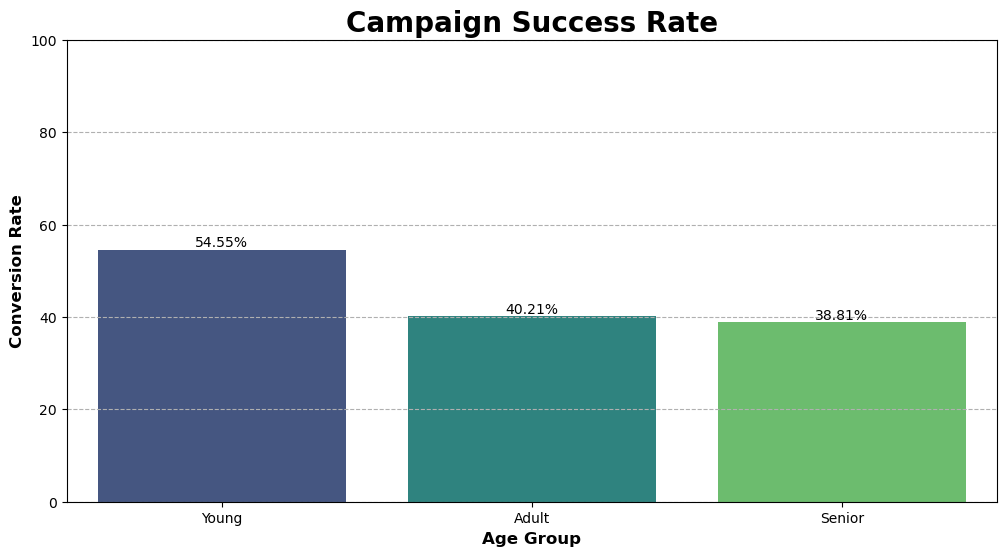

In [168]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'Age', y = 'Conversion Rate', data = success_cr, palette='viridis')
plt.title('Campaign Success Rate', weight='bold', fontsize=20)
plt.xlabel('Age Group', fontsize=12, weight='bold')
plt.ylabel('Conversion Rate', fontsize=12, weight='bold')
plt.ylim(0, 100)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.bar_label(ax.containers[0], fmt='%.2f%%')
plt.show()

Young group are more likely to make a purchase when receiving a campaign. To maximize campaign success, it is crucial to focus on targeting and tailoring marketing efforts towards young individuals. This could involve creating appealing and engaging campaigns that resonate with their preferences and interests. Both Adult and Senior group has similar rates, it is important to evaluate the existing strategies and identify potential improvement.